<a href="https://colab.research.google.com/github/kn9ck/MAT422/blob/master/HW_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT 422 - Homework 3.3

## Necessary and Sufficient Conditions of Local Minimizers
A **local minimizer** is a point where the function attains a minimum value.

First-Order Necessary Condition (Theorem 3.3.6):

* If $x_0$ is a local minimizer of a continuously differentiable function $f$, then $\nabla f(x_0) = 0$.


Second-Order Necessary Condition (Theorem 3.3.8):
* If $x_0$ is a local minimizer and $f$ is twice continuously differentiable, then the Hessian $H_f(x_0)$ is positive semi-definite (PSD).

Second-Order Sufficient Condition (Theorem 3.3.10):
* If $\nabla f(x_0) = 0$ and $H_f(x_0)$ is positive definite, then $x_0$ is a strict local minimizer.


Local minimizers of f1: [-1.41441441  1.41441441]


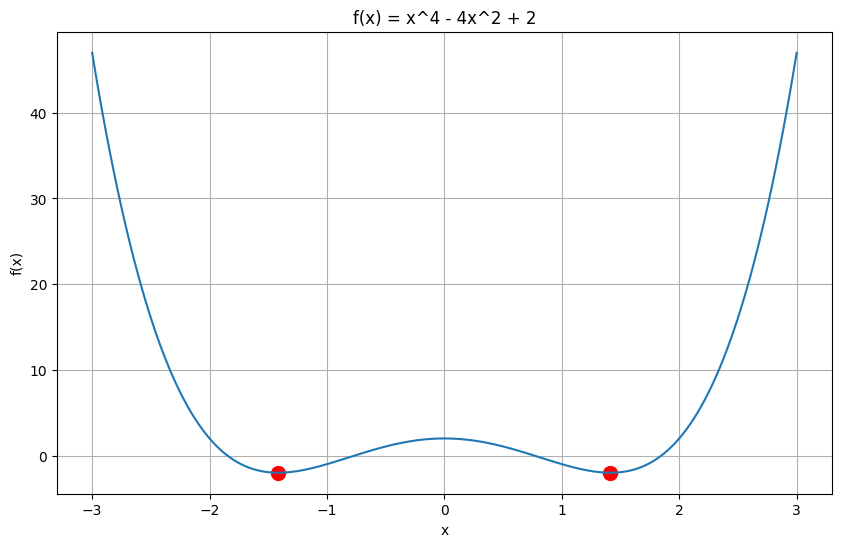

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f1(x):
    return x**4 - 4*x**2 + 2

def f1_derivative(x):
    return 4*x**3 - 8*x

#find local minimizers
x = np.linspace(-3, 3, 1000)
local_min = x[np.r_[True, f1(x[1:]) < f1(x[:-1])] & np.r_[f1(x[:-1]) < f1(x[1:]), True]]

print("Local minimizers of f1:", local_min)


x = np.linspace(-3, 3, 200)
y = f1(x)
plt.figure(figsize=(10, 6))
plt.plot(local_min, f1(local_min), 'ro', markersize=10, label='Local Minimums')
plt.plot(x, y)
plt.title("f(x) = x^4 - 4x^2 + 2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

In the example, we defined $f(x) = x⁴ - 4x² + 2$. Its derivative is $f^\prime (x) = 4x^3 - 8x$. The local minimizers occur where this derivative is zero. In the example, the **local minimizers** of $f$ occur at $x ≈ \pm 1.41$.

## Convexity and global minimizers
**Convexity** is a crucial property in optimization. A function $f$ is *convex* if for all $x$, $y$ and $\alpha \in [0,1]:
f((1-\alpha)x + \alpha y) ≤ (1-\alpha)f(x) + \alpha f(y)$

Key properties of convex functions include:

* First-Order Convexity Condition (Lemma 3.3.15):
A continuously differentiable function $f$ is convex if and only if:
$f(y) ≥ f(x) + \nabla f(x)^T(y - x) \text{ for all } x, y$.
* Second-Order Convexity Condition (Lemma 3.3.16):
A twice continuously differentiable function $f$ is convex if and only if its Hessian $H_f(x)$ is PSD for all $x$.
* Global Minimizers of Convex Functions (Theorem 3.3.19):
For a convex function, any local minimizer is also a global minimizer.


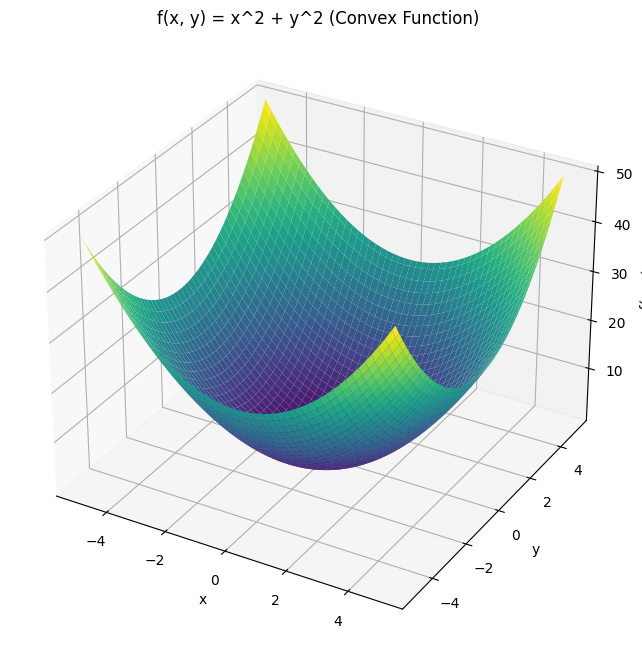

In [18]:
def f2(x, y):
    return x**2 + y**2

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f2(X, Y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('f(x, y) = x^2 + y^2 (Convex Function)')
plt.show()

In the example, we defined $f(x, y) = x² + y²$. This is a **convex** function, and its global minimizer is at (0, 0). The 3D plot clearly shows its **convex** shape.

## Gradient descent
**Gradient descent** is an iterative optimization algorithm for finding a local minimum of a differentiable function. The basic idea is to take steps proportional to the negative of the gradient of the function at the current point.

The steepest descent approach (Lemma 3.3.22) shows that the direction of steepest descent is the negative gradient:
$$\textbf{v}^* = -\frac{\nabla f(\textbf{x}_0)}{||∇f(\textbf{x}_0)||}$$

The gradient descent algorithm iterates as follows:
$$x_{k+1} = x_k - \alpha_k \nabla f(x_k)$$ where $\alpha_k$ is the step size.


If the step size is chosen correctly (by minimizing $f$ along the descent direction), the function value will decrease at each iteration, ensuring convergence to a local minimum.



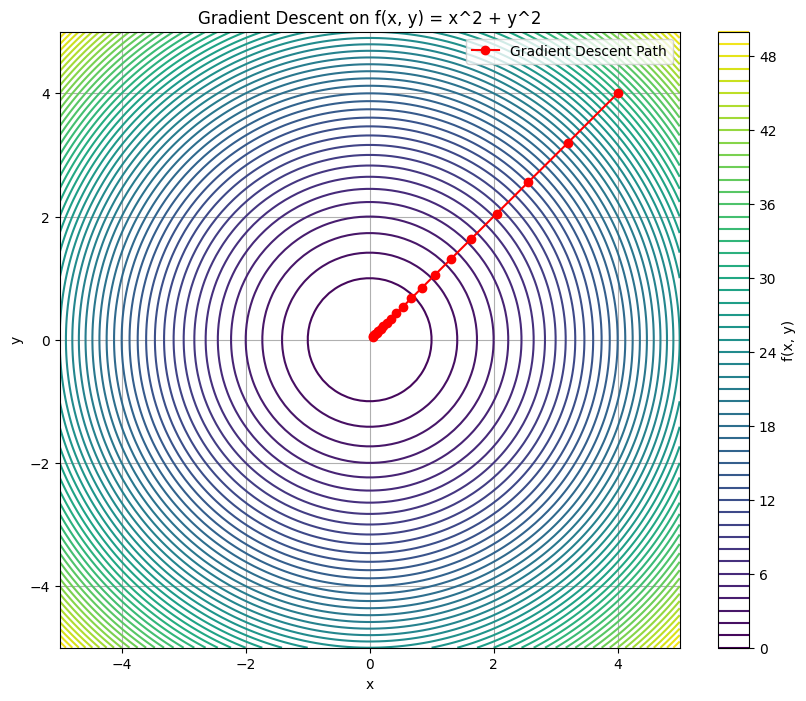


3. Gradient Descent
final point after gradient descent: [0.04611686 0.04611686]
function value at final point: 0.004253529586511731


In [19]:
def gradient(x, y):
    return np.array([2*x, 2*y])

#define algorithm
def gradient_descent(start, learning_rate, num_iterations):
    path = [start]
    point = np.array(start)

    for _ in range(num_iterations):
        grad = gradient(*point)
        point = point - learning_rate * grad
        path.append(point)

    return np.array(path)

#perform gradient descent
start_point = [4, 4]
learning_rate = 0.1
num_iterations = 20

path = gradient_descent(start_point, learning_rate, num_iterations)

#plot
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f2(X, Y)

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=50)
plt.colorbar(label='f(x, y)')
plt.plot(path[:, 0], path[:, 1], 'ro-', label='Gradient Descent Path')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent on f(x, y) = x^2 + y^2')
plt.legend()
plt.grid(True)
plt.show()

print("\n3. Gradient Descent")
print("final point after gradient descent:", path[-1])
print("function value at final point:", f2(*path[-1]))

In the example, we implemented gradient descent for the convex function $f(x, y) = x^2 + y^2$. We visualized the path of the algorithm as it converges to the global minimum at $(0, 0)$.